<a href="https://colab.research.google.com/github/ameram/dcnn-classification/blob/master/feature_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
This project is my final project, where I try to use a DCNN and VGG16 (which is also a DCNN) for getting the features out the input pictures. After that using a SVM model to classify the features.

# PART I
# Fetching and preparing the data

In [2]:
# Connecting to Google Drive for getting the data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# drive.mount("/content/drive", force_remount=True)

In [4]:
# Importing necessary library for creating the model
# and navigating through Google Drive.

import os
import matplotlib.pyplot as plt
import keras
from keras import layers, Sequential
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.optimizers import SGD
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from skimage.transform import resize
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


os.chdir('drive/MyDrive/data')

In [ ]:
#Creating test and validation datasets


# test = image_dataset_from_directory('.', class_names=['fruits', 'humans'], seed = 42, subset = 'training', validation_split=0.2, image_size=(100, 100))
# val = image_dataset_from_directory('.', class_names=['fruits', 'humans'], seed = 42, subset = 'validation', validation_split=0.2, image_size=(100, 100))

In [ ]:
# This is another way to import our data, which seems to perform better the preivous method.
# In this method images are converted to a numpy array, and then we get an array for data
# and another one for labels. After that we can scale it and split it.
# So finally there are 4 arrays (2 features, 2 labels) instead of 2 datasets.


Categories=['fruits', 'rc2', 'rc3',
            'rc4', 'rc5', 'rc6',
            'rc7', 'rc8', 'rc9',
            'rc10', 'rc11', 'rc12',
            'rc13', 'rc14', 'rc15']

flat_data_arr=[]  #input array
target_arr=[]     #output array

# This variable is for navigating folder structure, we don't need it.
datadir='' 

# Get the data for each category which is also the name of folder
# Structure should be something like this
# / (wd)
#   class1/
#       file1.jpg
#       file2.jpg
#       ...
#   class2/
#       file1.jpg
#       file2.jpg
#       ...


for i in Categories:
    
    print(f'Loading... category : {i}')
    path=os.path.join(datadir,i)

    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_array= resize(img_array,(100, 100, 3))

        flat_data_arr.append(np.asarray(img_array))
        if i == 'rc4':
          target_arr.append(0)
        else:
          target_arr.append(1)
        # target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
print(f"{len(flat_data_arr)} added successfully")

Loading... category : fruits
loaded category:fruits successfully
Loading... category : rc2
loaded category:rc2 successfully
Loading... category : rc3
loaded category:rc3 successfully
Loading... category : rc4


In [ ]:
print(len(flat_data_arr))
print(len(target_arr))
print(target_arr)

750
750
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
# Preprocessing after we get the data
# 1. Convert lists to np.array

X_array = np.asarray(flat_data_arr)
y_array = np.asarray(target_arr)

In [ ]:
# 2. Split the data

x_train, x_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2,random_state=42,stratify=y_array)

In [ ]:
# 3. Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0
# # 
print(f'Shape of training array: {x_train.shape}')
print(f'Shape of testing array: {x_test.shape}')

Shape of training array: (600, 100, 100, 3)
Shape of testing array: (150, 100, 100, 3)


# PART II
# Experimenting with DCNN and NN

In [ ]:
# Time to create the convolutional classifier
# this is not the main task and was create for the sake of 
# experimenting. We can safely skip this part.

# inputs = keras.Input(shape=(100, 100, 3))
# x = layers.Rescaling(1)(inputs)
# x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
# x = layers.Flatten()(x)
# outputs = layers.Dense(1, activation="tanh")(x)
# model = keras.Model(inputs=inputs, outputs=x)


model = Sequential([
    layers.Conv2D(filters=8,kernel_size=(3,3),  input_shape = (100, 100, 3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=16,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    # layers.Dropout(0.25),

    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    # layers.Dropout(0.25),
    layers.Dense(1, activation='softmax')
])

In [ ]:
# Same here, just a normal dense neural network for classification.
nn_model = keras.models.Sequential()
nn_model.add(keras.layers.Flatten(input_shape=[100, 100, 3]))
nn_model.add(keras.layers.Dense(2200, activation="relu"))
nn_model.add(keras.layers.Dense(1000, activation="relu"))
nn_model.add(keras.layers.Dense(90, activation="relu"))
nn_model.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0

In [ ]:
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 30000)             0         
                                                                 
 dense_2 (Dense)             (None, 2200)              66002200  
                                                                 
 dense_3 (Dense)             (None, 1000)              2201000   
                                                                 
 dense_4 (Dense)             (None, 90)                90090     
                                                                 
 dense_5 (Dense)             (None, 1)                 91        
                                                                 
Total params: 68,293,381
Trainable params: 68,293,381
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# LOSSES: categorical_crossentropy
# OPTIMIZERS: tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

In [ ]:
nn_model.compile(loss="binary_crossentropy",
                 optimizer="sgd", metrics=["accuracy"])

In [ ]:
# This is with numpy 
cnn_history_np = model.fit(x_train, y_train,
                           epochs=4, validation_data=(x_test, y_test))

Epoch 1/4
3/3 [==============================] - 2s 435ms/step - loss: 0.6789 - accuracy: 0.5000 - val_loss: 0.6550 - val_accuracy: 0.5000
Epoch 2/4
3/3 [==============================] - 2s 481ms/step - loss: 0.6637 - accuracy: 0.5000 - val_loss: 0.6496 - val_accuracy: 0.5000
Epoch 3/4
3/3 [==============================] - 1s 483ms/step - loss: 0.6554 - accuracy: 0.5000 - val_loss: 0.6397 - val_accuracy: 0.5000
Epoch 4/4
3/3 [==============================] - 1s 427ms/step - loss: 0.6443 - accuracy: 0.5000 - val_loss: 0.6321 - val_accuracy: 0.5000


In [ ]:
# This one is with default TF Datasets

cnn_history = model.fit(
    test,
    epochs=5,
    validation_data=val)

Epoch 1/5
3/3 [==============================] - 2s 411ms/step - loss: 16670138.0000 - accuracy: 0.4750 - val_loss: 28760756224.0000 - val_accuracy: 0.6000
Epoch 2/5
3/3 [==============================] - 1s 290ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.4000
Epoch 3/5
3/3 [==============================] - 1s 164ms/step - loss: nan - accuracy: 0.5250 - val_loss: nan - val_accuracy: 0.4000
Epoch 4/5
3/3 [==============================] - 1s 165ms/step - loss: nan - accuracy: 0.5250 - val_loss: nan - val_accuracy: 0.4000
Epoch 5/5
3/3 [==============================] - 1s 165ms/step - loss: nan - accuracy: 0.5250 - val_loss: nan - val_accuracy: 0.4000


In [ ]:
nn_history = nn_model.fit(test, epochs=5, validation_data=val)

Epoch 1/5
3/3 [==============================] - 2s 533ms/step - loss: 1591381458944.0000 - accuracy: 0.5500 - val_loss: 15063544332136753397760.0000 - val_accuracy: 0.6000
Epoch 2/5
3/3 [==============================] - 2s 726ms/step - loss: nan - accuracy: 0.5250 - val_loss: nan - val_accuracy: 0.4000
Epoch 3/5
3/3 [==============================] - 2s 488ms/step - loss: nan - accuracy: 0.5250 - val_loss: nan - val_accuracy: 0.4000
Epoch 4/5
3/3 [==============================] - 1s 459ms/step - loss: nan - accuracy: 0.5250 - val_loss: nan - val_accuracy: 0.4000
Epoch 5/5
3/3 [==============================] - 1s 461ms/step - loss: nan - accuracy: 0.5250 - val_loss: nan - val_accuracy: 0.4000


In [ ]:
nn_history_np = nn_model.fit(x_train, y_train, epochs=4, validation_data=(x_test, y_test))

Epoch 1/4
3/3 [==============================] - 2s 557ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/4
3/3 [==============================] - 1s 459ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/4
3/3 [==============================] - 1s 464ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 4/4
3/3 [==============================] - 2s 657ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000


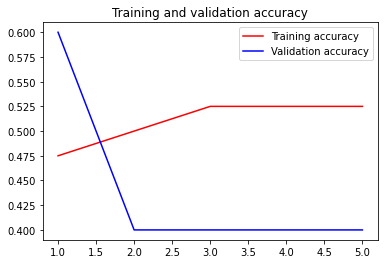

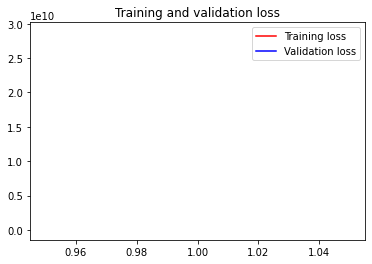

In [ ]:
accuracy = cnn_history.history["accuracy"]
val_accuracy = cnn_history.history["val_accuracy"]
loss = cnn_history.history["loss"]
val_loss = cnn_history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

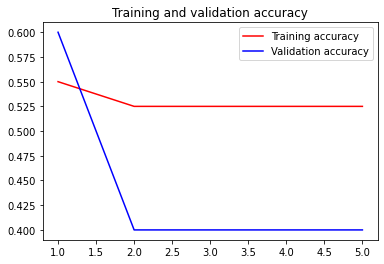

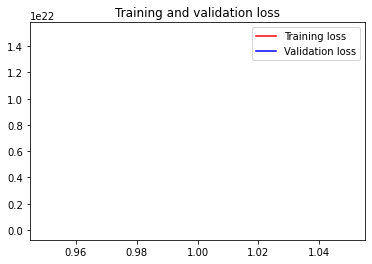

In [ ]:
accuracy = nn_history.history["accuracy"]
val_accuracy = nn_history.history["val_accuracy"]
loss = nn_history.history["loss"]
val_loss = nn_history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

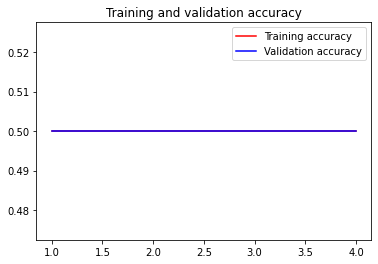

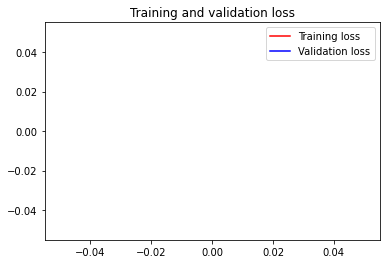

In [ ]:
accuracy = nn_history_np.history["accuracy"]
val_accuracy = nn_history_np.history["val_accuracy"]
loss = nn_history_np.history["loss"]
val_loss = nn_history_np.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Note: These models don't seem to work very well, so instead we use dcnn and vgg16 for _feature extraction_ and then reshape it so that we can feed it through __SVM__ classifier.

# PART III
# USING SVM

In [ ]:
# Normal convolutional neural netowrk just for getting the features out of a
# picutre.

# The architecture is as follows:
# CONV 2D -> MaxPooling -> CONV2D -> CONV2D -> MaxPooling -> BatchNorm
# Initially I didn't include batch normalization, however SVM classifier
# wouldn't converge if we didn't normalize the final data.

fx_model = Sequential([
    layers.Conv2D(filters=8,kernel_size=(3,3),  input_shape = (100, 100, 3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=16,kernel_size=(3,3), activation='relu'),
    # layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization()
])

In [ ]:
fx_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 8)         224       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 16)        1168      
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 32)      

In [ ]:
fx_model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])


In [ ]:
type(x_train)


numpy.ndarray

In [ ]:
# Getting the features out of the dcnn and adding it all to a np array.

fx_features = []
fx_features.append(fx_model.predict(x = x_train))
fx_features.append(fx_model.predict(x = x_test))
fx_features = np.concatenate(fx_features)
fx_features.shape

5/5 [==============================] - 1s 115ms/step


(750, 22, 22, 32)

In [ ]:
# Same for the labels

fx_labels = []
fx_labels.append(y_train)
fx_labels.append(y_test)
fx_labels = np.concatenate(fx_labels)
fx_labels.shape

(750,)

In [ ]:
# Reshaping and splitting the data for using them
# in the svm classifier.
svm_x_train, svm_x_test, svm_y_train, svm_y_test = train_test_split(fx_features, fx_labels, test_size=0.2,random_state=42,stratify=fx_labels)

In [ ]:
svm_x_train.shape

(600, 22, 22, 32)

In [ ]:
# Since the data is 4 dimentional data. We have to reshape it to 2D for svm.
flat_svm_x_train = svm_x_train.reshape(600, -1)
flat_svm_x_test = svm_x_test.reshape(150, -1)

In [ ]:
# Getting the results.

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ])

# vgg_svc = LinearSVC(C=1, loss='hinge')
svm_clf.fit(flat_svm_x_train, svm_y_train)

svc_y_pred = svm_clf.predict(flat_svm_x_test)
print("The predicted Data is :")
print(svc_y_pred)
print("The actual data is:")
print(np.array(svm_y_test))
print(f'The model is {accuracy_score(svc_y_pred, svm_y_test) * 100} accurate.')

The predicted Data is :
[1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1
 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1]
The actual data is:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
The model is 73.33333333333333 accurate.


In [ ]:
precision_recall_fscore_support(svm_y_test, svc_y_pred, average='binary')

(0.9901960784313726, 0.7214285714285714, 0.8347107438016529, None)

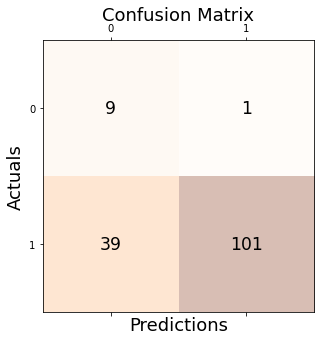

In [ ]:
conf_matrix = confusion_matrix(y_true=svm_y_test, y_pred=svc_y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Using KERNEL SVC

rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=1, C=0.001)) ])


rbf_kernel_svm_clf.fit(flat_svm_x_train, svm_y_train)

ksvm_y_pred = rbf_kernel_svm_clf.predict(flat_svm_x_test)
print("The predicted Data is :")
print(ksvm_y_pred)
print("The actual data is:")
print(np.array(svm_y_test))
print(f'The model is {accuracy_score(ksvm_y_pred, svm_y_test) * 100} accurate.')

The predicted Data is :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
The actual data is:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
The model is 93.33333333333333 accurate.


In [ ]:
precision_recall_fscore_support(svm_y_test, ksvm_y_pred, average='binary')

(0.9333333333333333, 1.0, 0.9655172413793104, None)

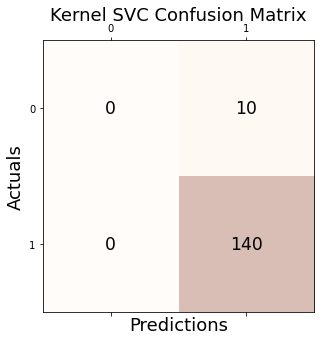

In [ ]:
conf_matrix = confusion_matrix(y_true=svm_y_test, y_pred=ksvm_y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Kernel SVC Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C': [0.001, 1, 5, 20], 'gamma': [1, 5]}]
kscv = SVC(kernel="rbf", gamma=5, C=0.001)

grid_search = GridSearchCV(kscv, param_grid, cv=2, scoring='accuracy',
                           return_train_score=True)

grid_search.fit(flat_svm_x_train, svm_y_train)

grid_search.best_params_

{'C': 0.001, 'gamma': 1}

## Second way of feature extraction using VGG16 pretrained model.

In [ ]:
# First we have to download the vgg16 model and give the weights, while
# removing the top classifier part.
conv_base = keras.applications.vgg16.VGG16(weights='imagenet',
                                           include_top=False,
                                           input_shape=(100, 100, 3))
conv_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                              

In [ ]:
# Just a helper method like the one before for getting features out
# of vgg model and preparing it for the svm.

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocesses_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocesses_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

In [ ]:
# Sine we can feed the whole data set to vgg, we don't have to use the splitted 
# dataset for prediction. And now the new complete dataset is created.
data_for_vgg = image_dataset_from_directory('.',
                                            class_names=['fruits', 'rc2',
                                                         'rc3', 'rc4',
                                                         'rc5', 'rc6', 'rc7',
                                                         'rc8', 'rc9', 'rc10',
                                                         'rc11', 'rc12', 'rc13',
                                                         'rc14', 'rc15'],
                                            seed = 42, image_size=(100, 100))

Found 750 files belonging to 15 classes.


In [ ]:
# Getting the features

vgg_features, vgg_label = get_features_and_labels(data_for_vgg)

1/1 [==============================] - 1s 1s/step


In [ ]:
print(np.unique(vgg_label))
lbl_cond = vgg_label > 1
vgg_label[lbl_cond] = 1
print(np.unique(vgg_label))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[0 1]


In [ ]:
vgg_features.shape

(750, 3, 3, 512)

In [ ]:
# Reshaping it for the svm.

vgg_features = vgg_features.reshape(750, -1)
vgg_features.shape

(750, 4608)

In [ ]:
# Preparing for svm.

vgg_x_train, vgg_x_test, vgg_y_train, vgg_y_test  = train_test_split(vgg_features, vgg_label, test_size=0.2,random_state=42,stratify=vgg_label)

In [ ]:
# Getting the results.

vgg_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel="rbf", gamma=1, C=0.001))
    ])

# vgg_svc = LinearSVC(C=1, loss='hinge')
vgg_svm_clf.fit(vgg_x_train, vgg_y_train)

vgg_y_pred = vgg_svm_clf.predict(vgg_x_test)
print("The predicted Data is :")
print(vgg_y_pred)
print("The actual data is:")
print(np.array(vgg_y_test))
print(f'The model is {accuracy_score(vgg_y_pred, vgg_y_test) * 100} accurate.')

The predicted Data is :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
The actual data is:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
The model is 93.33333333333333 accurate.


In [ ]:
precision_recall_fscore_support(vgg_y_test, vgg_y_pred, average='binary')

(0.9333333333333333, 1.0, 0.9655172413793104, None)

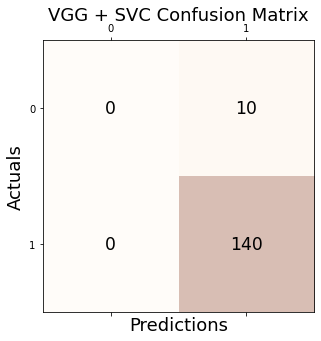

In [ ]:
conf_matrix = confusion_matrix(y_true=vgg_y_test, y_pred=vgg_y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('VGG + SVC Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# vgg_x_train, vgg_x_test, vgg_y_train, vgg_y_test
# Getting the results.

vgg_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ])

vgg_svm_clf.fit(vgg_x_train, vgg_y_train)

v_svc_y_pred = vgg_svm_clf.predict(vgg_x_test)
print("The predicted Data is :")
print(v_svc_y_pred)
print("The actual data is:")
print(np.array(vgg_y_test))
print(f'The model is {accuracy_score(v_svc_y_pred, vgg_y_test) * 100} accurate.')

The predicted Data is :
[1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1]
The actual data is:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
The model is 89.33333333333333 accurate.


In [ ]:
precision_recall_fscore_support(vgg_y_test, v_svc_y_pred, average='binary')

(1.0, 0.8857142857142857, 0.9393939393939393, None)

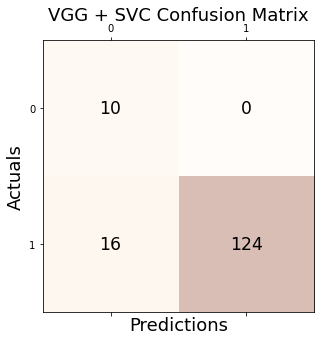

In [ ]:
conf_matrix = confusion_matrix(y_true=vgg_y_test, y_pred=v_svc_y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('VGG + SVC Confusion Matrix', fontsize=18)
plt.show()